In [2]:
import networkx as nx
import matplotlib.pyplot as plt

## Sample Markov decision process properties

In [3]:
# Define the states and actions
states = ['S1', 'S2']  # S3 will be the terminal state
actions = ['a1', 'a2']

# Define the transition probabilities as a dictionary
transitions = {
    ('S1', 'a1'): {'S1': 0.8, 'S2': 0.2},
    ('S1', 'a2'): {'S2': 1.0},
}

# Define the rewards for each (state, action) pair
rewards = {
    ('S1', 'a1'): 4,
    ('S1', 'a2'): 10,
}

## Visualize the MDP process

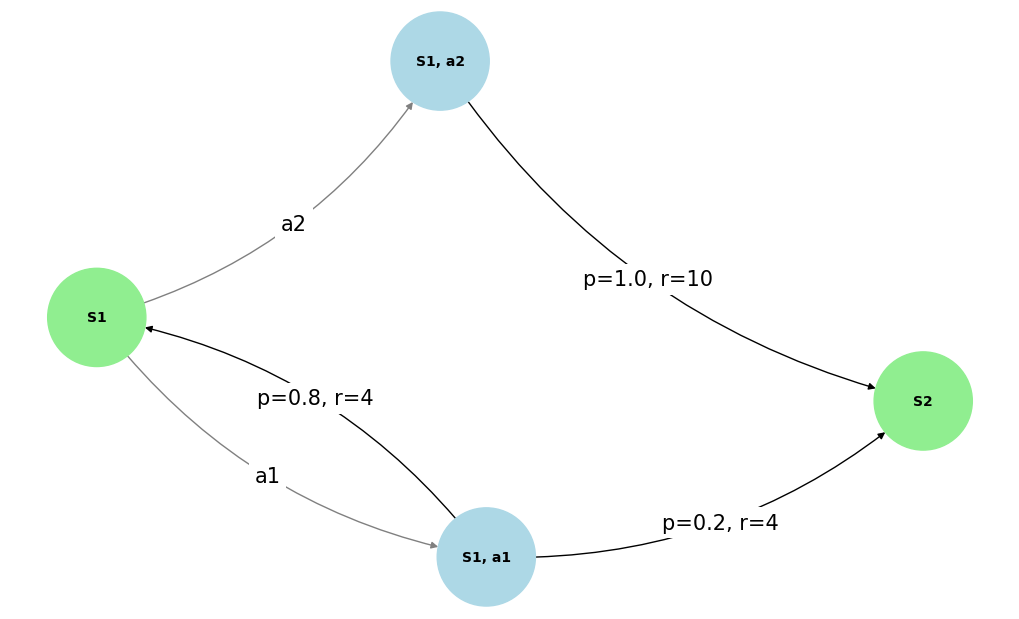

In [4]:
# Create a new directed graph
G = nx.DiGraph()

# Add subnodes for states and actions, but exclude the terminal state
for state in states:
    if state != 'S2':
        for action in actions:
            G.add_node(f'{state}, {action}', label=f'{state}, {action}', color='lightblue')
            G.add_edge(state, f'{state}, {action}', color='gray', label=action)

# Add edges for transitions between actions and resulting states
for (state, action), next_states in transitions.items():
    for next_state, prob in next_states.items():
        reward = rewards.get((state, action), 0)
        G.add_edge(f'{state}, {action}', next_state, label=f'p={prob}, r={reward}', color='black')

# Add the terminal state node separately
G.add_node('S2', color='lightgreen')

plt.figure(figsize=(10, 6))

# Use a spring layout with higher gravity (k) for better repulsion
pos = nx.spring_layout(G, k=0.5, scale=2)

# Extract edge colors
edge_colors = [G[u][v]['color'] for u, v in G.edges()]

# Extract node colors
node_colors = [G.nodes[n].get('color', 'lightgreen') for n in G.nodes()]

nx.draw(G, pos, with_labels=True, node_size=5000, node_color=node_colors, font_size=10, font_weight='bold', arrows=True, edge_color=edge_colors, connectionstyle='arc3,rad=0.2')

# Annotate the edges manually for action transitions
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15, bbox=dict(facecolor='white', edgecolor='none'), rotate=False, connectionstyle='arc3,rad=0.2')


plt.savefig('../charts/mdp_simple.eps', format='eps')

plt.show()
